In [1]:
import os
os.chdir(os.path.dirname(os.getcwd()))

In [2]:
from helpers import *
import torch
import json

In [3]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='object_detection/yolov5_models/yolov5m.pt')

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)


Using cache found in /home/ntnhu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-12-15 torch 1.9.1 CUDA:0 (GeForce RTX 3080 Ti, 12054MiB)

Fusing layers... 
Model Summary: 290 layers, 21172173 parameters, 0 gradients
Adding AutoShape... 


In [4]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,126.547394,197.141632,1143.490234,712.563477,0.857716,0,person
1,751.022095,43.456665,1131.118408,708.770752,0.785549,0,person
2,435.182251,435.544922,522.218811,718.979126,0.733487,27,tie
3,1103.674683,395.215576,1279.656128,713.860718,0.363860,0,person
4,983.109863,302.117584,1135.629150,707.364380,0.265507,27,tie


In [5]:
temp = results.pandas().xyxy[0]
# save_df_to_json(temp, 'temp_2.json')

In [6]:
# data

In [7]:
results.save('object_detection/images')

Saved 1 image to object_detection/images


In [16]:
import cv2

img_name = '/mnt/SEAGATE/root/V3C1/keyframes/extract/00001/shot00001_100_RKF.png'
img = cv2.imread(img_name)
# #convert to RGB from BGR
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dominant = DominantColors(img, cluster=5)
color = dominant.dominant_colors()
print(color)

[[     119.84      121.35      124.34]
 [     18.078      15.886      16.949]
 [     47.111      47.581      58.427]
 [     165.27      160.43      161.35]
 [     81.099      82.251      91.889]]


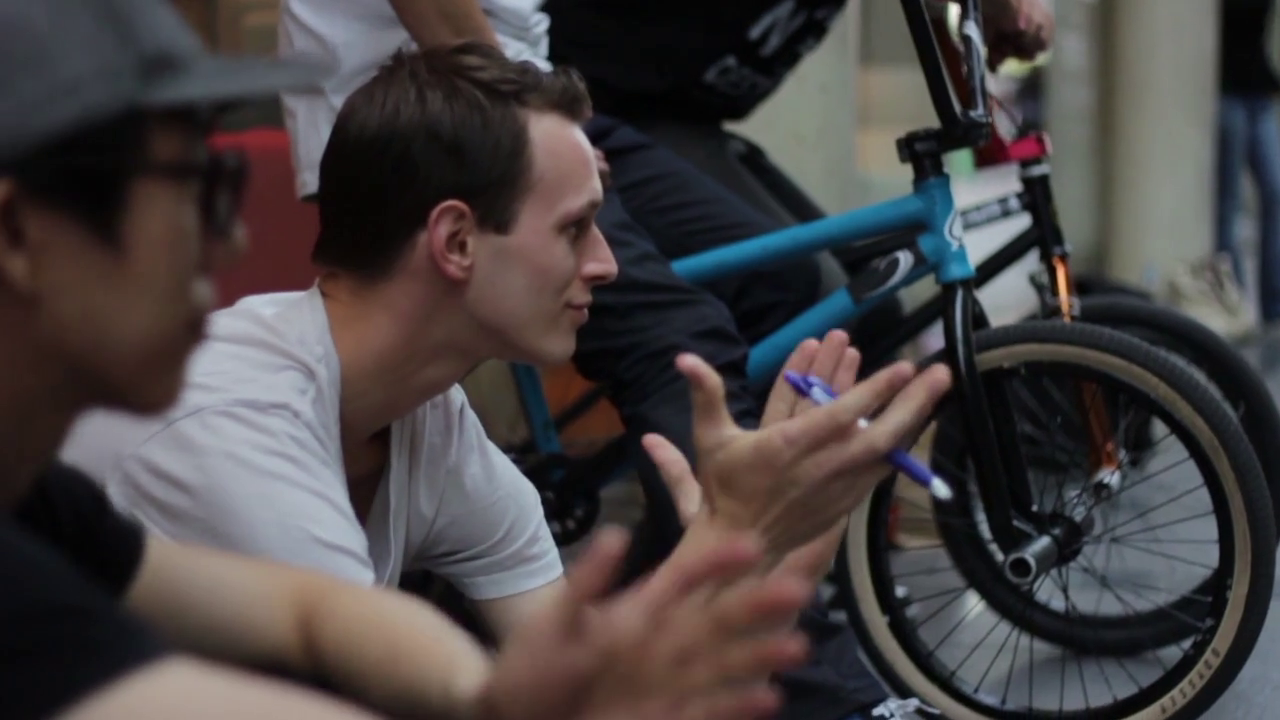

In [17]:
Image.open(img_name)